In [1]:
!nvidia-smi

Thu Jun  6 09:35:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content/{HOME}/weights


In [3]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 443 (delta 158), reused 139 (delta 130), pack-reused 231
Receiving objects: 100% (443/443), 12.86 MiB | 14.70 MiB/s, done.
Resolving deltas: 100% (229/229), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 60.2 MB/s eta 0:00:00


In [4]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-r36rdykk
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-r36rdykk
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=5c8d8b34adf5040fd8c8e2482c9e3fac2e0dea68b835b1a2e8e4bf8a265325ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-q77ssbsk/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [5]:
!pip install torch

In [6]:
!pip install torchvision

In [7]:
!pip install supervision==0.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: supervision
    Found existing installation: supervision 0.4.0
    Uninstalling supervision-0.4.0:
      Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.15 requires pillow>=9.0.0, but you have pillow 8.4.0 which is incompatible.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.12.0 which is incompatible.


In [3]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content/{HOME}/weights
/content/{HOME}/weights/weights


In [4]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [5]:
%cd {HOME}
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

/content/{HOME}/weights
cuda:0


In [8]:
GROUNDING_DINO_CONFIG_PATH = '/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py'
GROUNDING_DINO_CHECKPOINT_PATH = '/content/{HOME}/weights/weights/groundingdino_swint_ogc.pth'

In [9]:
from groundingdino.util.inference import Model
GD_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)


final text_encoder_type: bert-base-uncased


In [42]:
import cv2
image_bgr = cv2.imread("/content/t2.webp")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_original = image_bgr

print(image_bgr.shape)

image_bgr = cv2.resize(image_bgr, (1024, 1024))
image_rgb = cv2.resize(image_rgb, (1024, 1024))
image_original = cv2.resize(image_original, (1024, 1024))

print(image_bgr.shape)



(400, 600, 3)
(1024, 1024, 3)


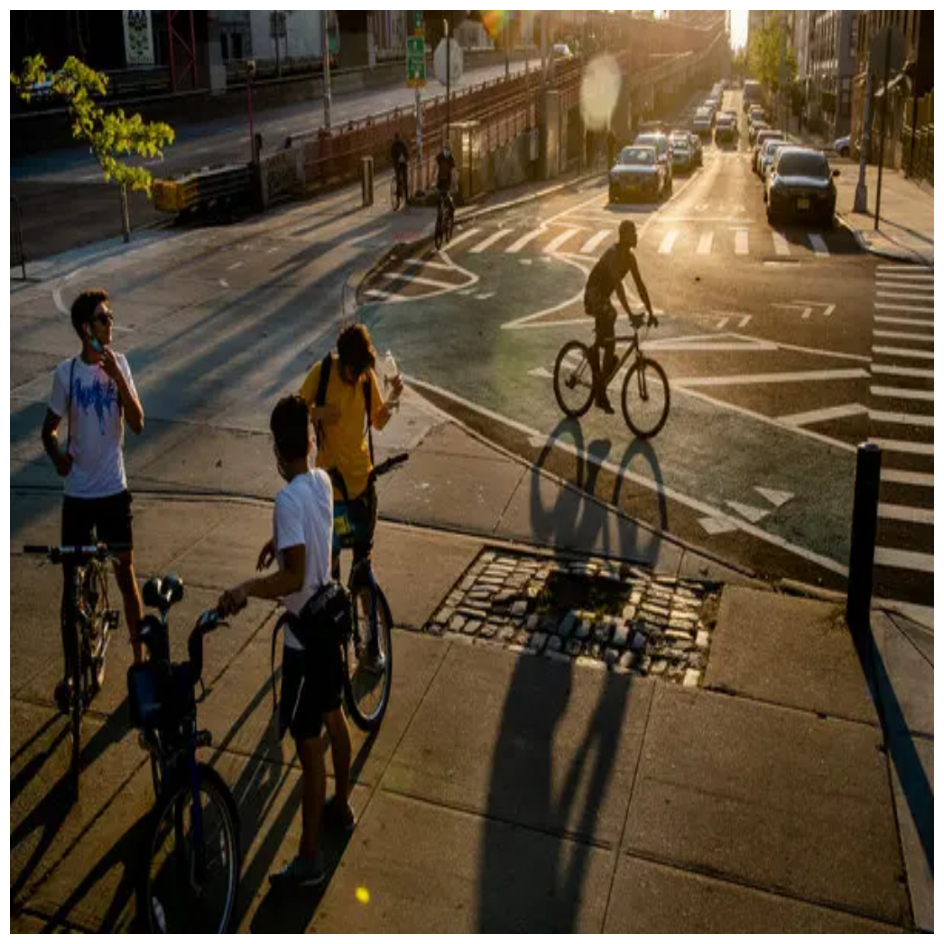

In [43]:
import supervision as sv
sv.plot_image(image_bgr)

In [44]:
# detect objects
CLASSES = ['person']
detections = GD_model.predict_with_classes(
    image=image_rgb,
    classes=CLASSES,
    box_threshold=0.35,
    text_threshold=0.25
)

print(detections)

Detections(xyxy=array([[ 33.933613, 309.6088  , 152.31898 , 775.6106  ],
       [221.00443 , 425.37222 , 383.8992  , 973.624   ],
       [634.6371  , 232.70483 , 716.6543  , 448.26752 ],
       [317.13873 , 346.10474 , 429.29382 , 736.11914 ],
       [419.82352 , 133.92369 , 444.06943 , 223.33406 ],
       [468.82892 , 149.15123 , 497.72803 , 255.7144  ]], dtype=float32), mask=None, confidence=array([0.80132514, 0.7647139 , 0.7355749 , 0.676102  , 0.61543655,
       0.5692946 ], dtype=float32), class_id=array([0, 0, 0, 0, 0, 0]), tracker_id=None)


In [45]:
print(detections.xyxy, type(detections.xyxy))
detected_boxes = detections.xyxy
class_id = detections.class_id
print(class_id)

[[ 33.933613 309.6088   152.31898  775.6106  ]
 [221.00443  425.37222  383.8992   973.624   ]
 [634.6371   232.70483  716.6543   448.26752 ]
 [317.13873  346.10474  429.29382  736.11914 ]
 [419.82352  133.92369  444.06943  223.33406 ]
 [468.82892  149.15123  497.72803  255.7144  ]] <class 'numpy.ndarray'>
[0 0 0 0 0 0]


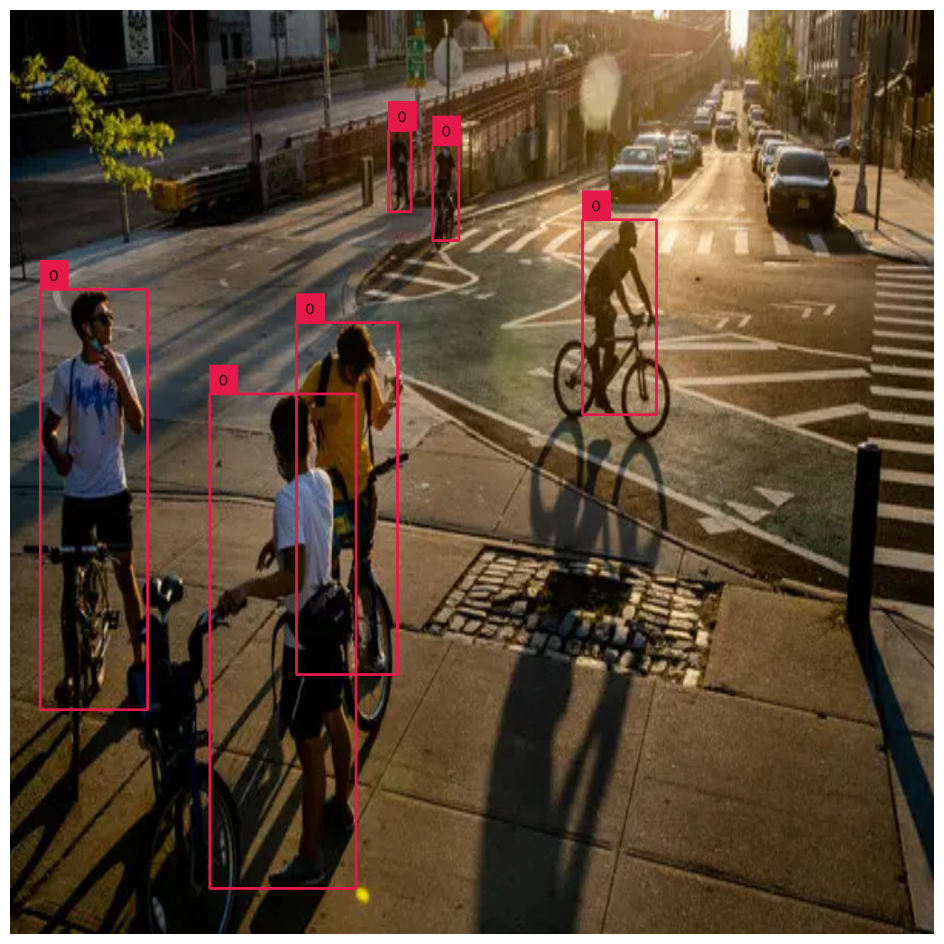

In [46]:
import supervision as sv
box_annotator = sv.BoxAnnotator()
annotated_frame = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=False, labels=[class_id])
sv.plot_image(annotated_frame)


In [47]:
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = '/content/{HOME}/weights/weights/sam_vit_h_4b8939.pth'

from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

mask_predictor = SamPredictor(sam)


In [48]:
import numpy as np
mask_annotator =  sv.MaskAnnotator(color=sv.Color.blue())
segmented_mask = []
counter = 0
for mybox in detected_boxes:
    mybox = np.array(mybox)
    print(mybox)


    mask_predictor.set_image(image_rgb)
    masks, scores, logits = mask_predictor.predict(
        point_coords=None,
        point_labels=None,
        box=mybox,
        multimask_output=False
    )

    segmented_mask.append(masks)
    print(len(masks), masks.shape)

# plot mask on image using supervision
    detections = sv.Detections(
        xyxy=sv.mask_to_xyxy(masks=masks),
        mask=masks
    )

    detections = detections[detections.area == np.max(detections.area)]
    print(CLASSES[class_id[counter]])

    annotated_image = box_annotator.annotate(scene=image_original.copy(), detections=detections, skip_label=False, labels=[CLASSES[class_id[counter]]])
    annotated_image = mask_annotator.annotate(scene=annotated_image.copy(), detections=detections)
    image_original = annotated_image

    counter+=1

[ 33.933613 309.6088   152.31898  775.6106  ]
1 (1, 1024, 1024)
person
[221.00443 425.37222 383.8992  973.624  ]
1 (1, 1024, 1024)
person
[634.6371  232.70483 716.6543  448.26752]
1 (1, 1024, 1024)
person
[317.13873 346.10474 429.29382 736.11914]
1 (1, 1024, 1024)
person
[419.82352 133.92369 444.06943 223.33406]
1 (1, 1024, 1024)
person
[468.82892 149.15123 497.72803 255.7144 ]
1 (1, 1024, 1024)
person


Plot image using Supervion

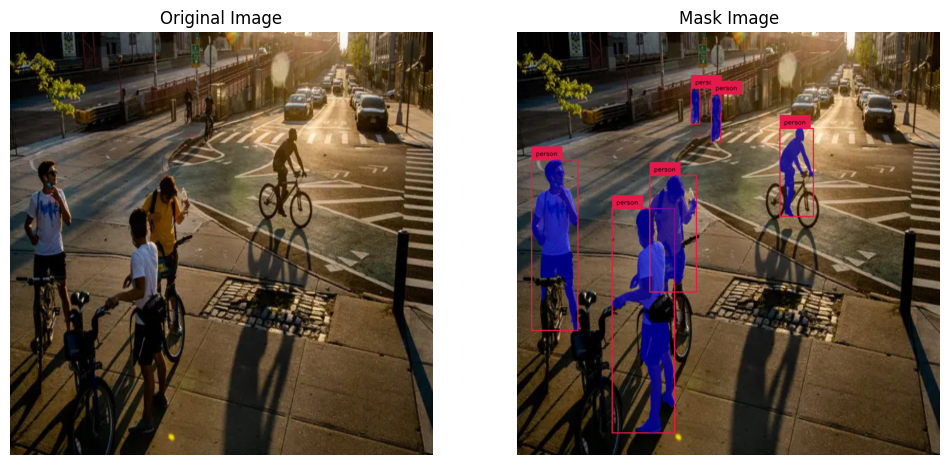

In [49]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1,2),
    titles=['Original Image', 'Mask Image']

)


In [50]:
print(len(segmented_mask), type(segmented_mask[0]), segmented_mask[0].shape)

for i in range(len(segmented_mask)):

  segmented_mask[i] = segmented_mask[i].transpose(1,2,0)
  segmented_mask[i] = np.array(segmented_mask[i]*255).astype('uint8')
  segmented_mask[i]  = cv2.cvtColor(segmented_mask[i] , cv2.COLOR_GRAY2BGR)


print(segmented_mask[0].shape)

6 <class 'numpy.ndarray'> (1, 1024, 1024)
(1024, 1024, 3)


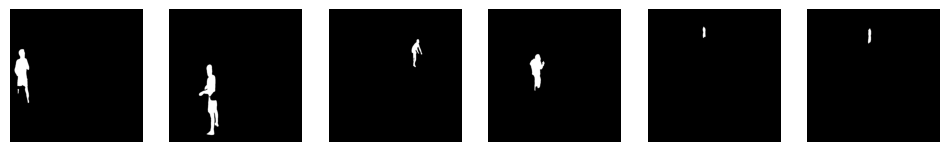

In [51]:
sv.plot_images_grid(
    images=segmented_mask,
    grid_size=(1, len(segmented_mask)),

)

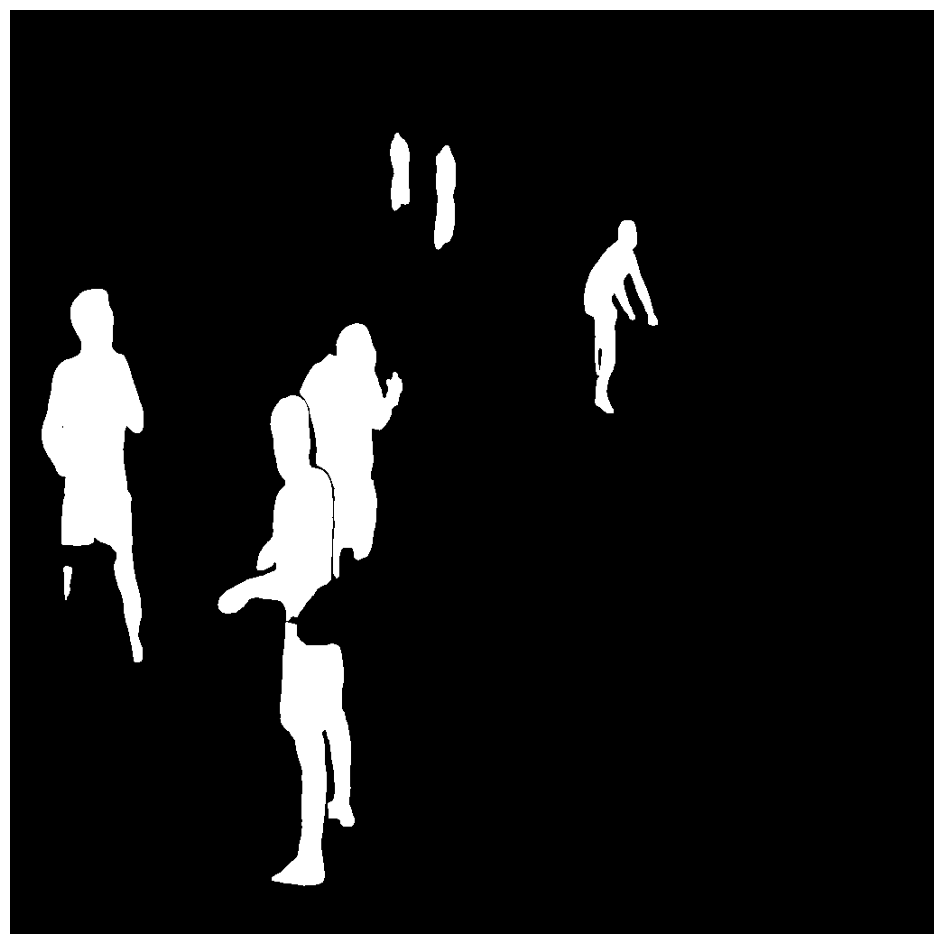

In [52]:
segmented_image = segmented_mask[0]

for i in range(len(segmented_mask)):
  try:
    segmented_image = cv2.bitwise_or(segmented_image, segmented_mask[i+1])
  except:
    pass

sv.plot_image(segmented_image)

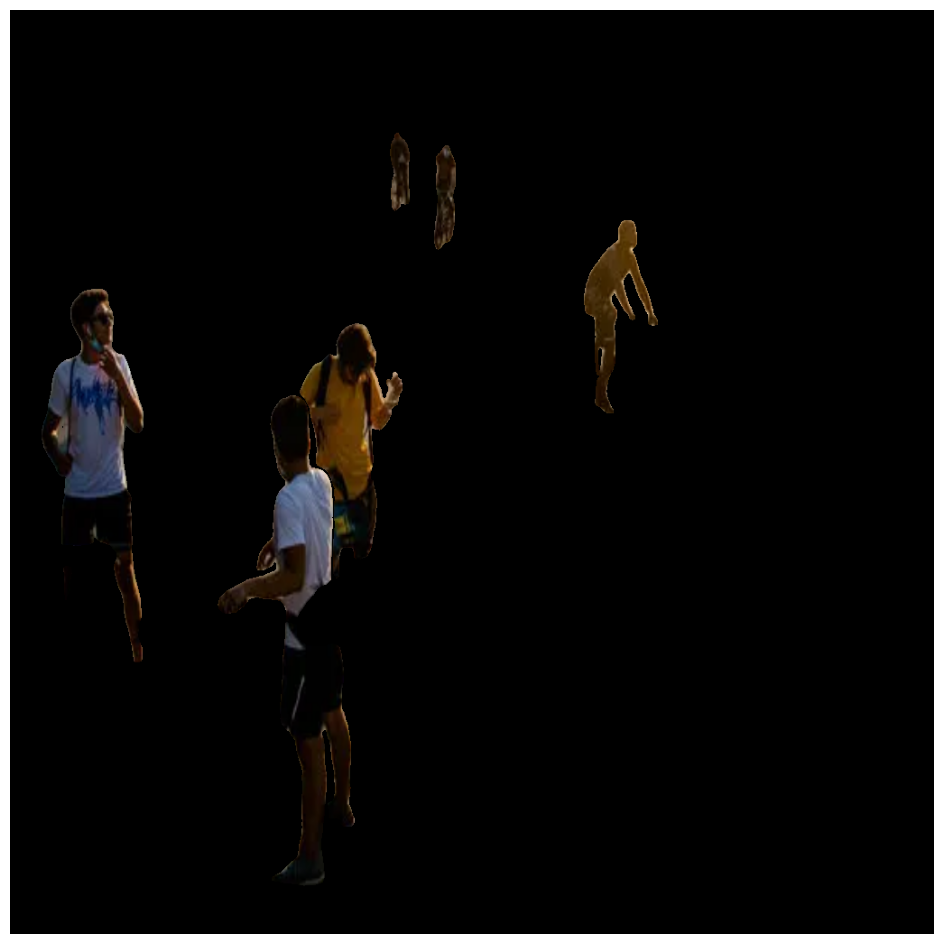

In [53]:
segmented_image = cv2.bitwise_and(segmented_image, image_bgr)
sv.plot_image(segmented_image)

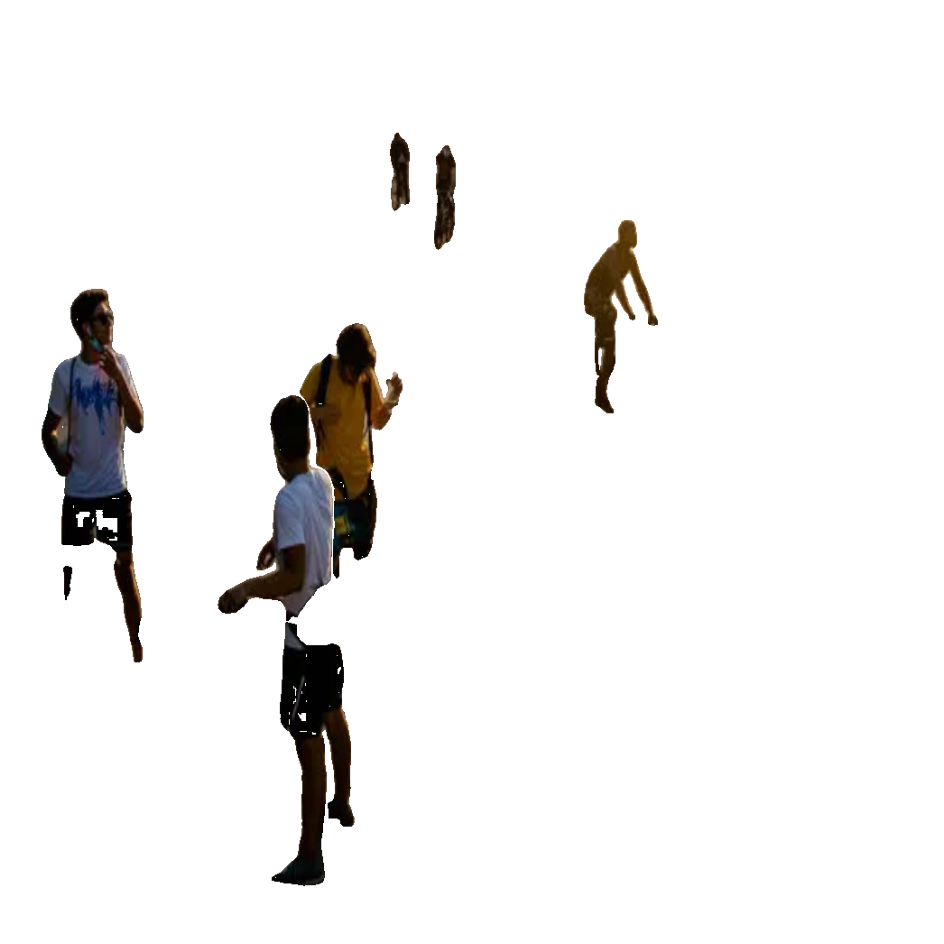

In [54]:
segmented_image[np.where((segmented_image == [0, 0, 0]).all(axis=2))] = [255, 255, 255]
sv.plot_image(segmented_image)

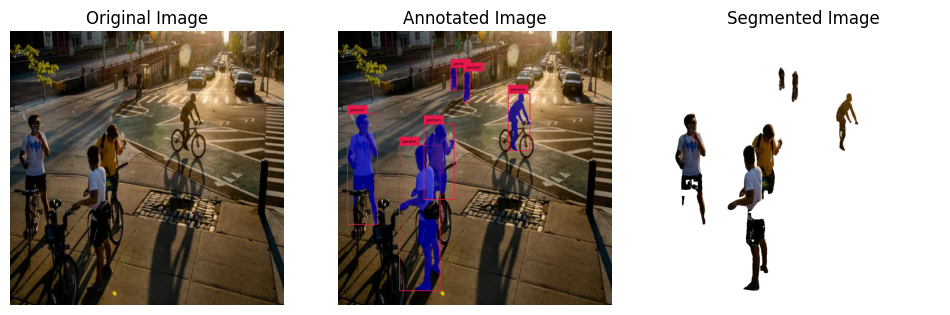

In [55]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image, segmented_image],
    grid_size=(1, 3),
    titles=['Original Image', 'Annotated Image', 'Segmented Image'],
    #size=(48,48)

)